<a href="https://colab.research.google.com/github/HriddhiDoley/predicting_olympic_medal/blob/main/predict_olympic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This project explores the use of machine learning (ML) and deep learning (DL) techniques to predict the total number of Olympic medals a country will win. By analyzing various factors like GDP, population, and sports infrastructure, this study provides valuable insights into the key determinants of Olympic success. Leveraging models such as Random Forest and Neural Networks, the findings highlight the interplay between economic and sports-related features in influencing medal counts.


In [6]:
# Olympic Medals Prediction Project

## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Step 1: Load the Data set

In [7]:
# Load Dataset
data = pd.read_csv('gni-olympics.csv')
data.head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


# Step 2: Understand the Data
1. Basic Analysis
2. Univariate
3. Bivariate / Multivariate analysis  

## 2.1 Basic Analysis
1. How big is the data?
2. How does the data look like?
3. What is the data type of cols?
4. Are there any missing values?
5. How does the data look mathematically?
6. Are there any duplicate values?
7. How is the correlation between cols?

In [8]:
# 1. Shape of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (93, 14)


In [9]:
# 2. First few rows
print("First 5 rows:")
print(data.head())

First 5 rows:
   iso  ioc        name      continent  population            gdp  \
0  ARG  ARG   Argentina  South America    45376763   383066977654   
1  ARM  ARM     Armenia           Asia     2963234    12645459214   
2  AUS  AUS   Australia        Oceania    25687041  1330900925057   
3  AUT  AUT     Austria         Europe     8917205   428965397959   
4  AZE  AZE  Azerbaijan         Europe    10110116    42607176471   

   olympics_index  sports_index  olympicsIndex  sportsIndex  total  gold  \
0       19.597142      9.324537      19.597142     9.324537      3     0   
1       19.681457     13.497324      19.681457    13.497324      4     0   
2       31.170099     11.073845      31.170099    11.073845     46    17   
3       12.212139     15.923033      12.212139    15.923033      7     1   
4       18.213838     13.103344      18.213838    13.103344      7     0   

   silver  bronze  
0       1       2  
1       2       2  
2       7      22  
3       1       5  
4       3     

In [10]:
# 3. Random sample of 5 rows
print("Random Sample:")
print(data.sample(5))

Random Sample:
    iso  ioc       name continent  population            gdp  olympics_index  \
62  NAM  NAM    Namibia    Africa     2540916    10699926683       10.279839   
91  XKX  KOS     Kosovo       NaN     1775378     7611402165        7.980882   
56  MAR  MAR    Morocco    Africa    36910558   112870591694        7.149706   
40  IDN  INA  Indonesia      Asia   273523621  1058423838345        8.214139   
7   BGR  BUL   Bulgaria    Europe     6927288    69105101090       22.684033   

    sports_index  olympicsIndex  sportsIndex  total  gold  silver  bronze  
62     29.504011      10.279839    29.504011      1     0       1       0  
91     22.469058       7.980882    22.469058      2     2       0       0  
56     21.298577       7.149706    21.298577      1     1       0       0  
40     11.075019       8.214139    11.075019      5     1       1       3  
7      19.656028      22.684033    19.656028      6     3       1       2  


In [11]:
# 4. Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     int64  
 6   olympics_index  91 non-null     float64
 7   sports_index    91 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 10.3+ KB


In [15]:
# 5. Null values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
iso               0
ioc               0
name              0
continent         5
population        0
gdp               0
olympics_index    2
sports_index      2
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [16]:
# Drop the missing values rows # Fill in the missing values in feature engineering
#data.dropna(inplace=True)

In [17]:
# 6. Statistical summary
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
         population           gdp  olympics_index  sports_index  \
count  8.700000e+01  8.700000e+01       87.000000     87.000000   
mean   7.033494e+07  9.207408e+11       21.052401     16.310227   
std    2.122157e+08  2.786623e+12       12.719249      9.092396   
min    3.393800e+04  1.089204e+09        1.000000      7.396478   
25%    5.419151e+06  5.292030e+10       13.285592     10.823462   
50%    1.155600e+07  1.917183e+11       18.787691     13.891772   
75%    5.133173e+07  5.658873e+11       26.217107     19.019704   
max    1.402112e+09  2.093660e+13      100.000000     72.227313   

       olympicsIndex  sportsIndex       total       gold     silver     bronze  
count      87.000000    87.000000   87.000000  87.000000  87.000000  87.000000  
mean       21.052401    16.310227   12.298851   3.862069   3.873563   4.563218  
std        12.719249     9.092396   19.556189   7.212993   6.787137   6.349695  
min         1.000000     7.396478    1.000000   0.0

In [18]:
# 7. Duplicated rows
print("Number of Duplicated Rows:", data.duplicated().sum())

Number of Duplicated Rows: 0


In [19]:
# 8. Drop duplicates
data.drop_duplicates(inplace=True)

Correlation Matrix:


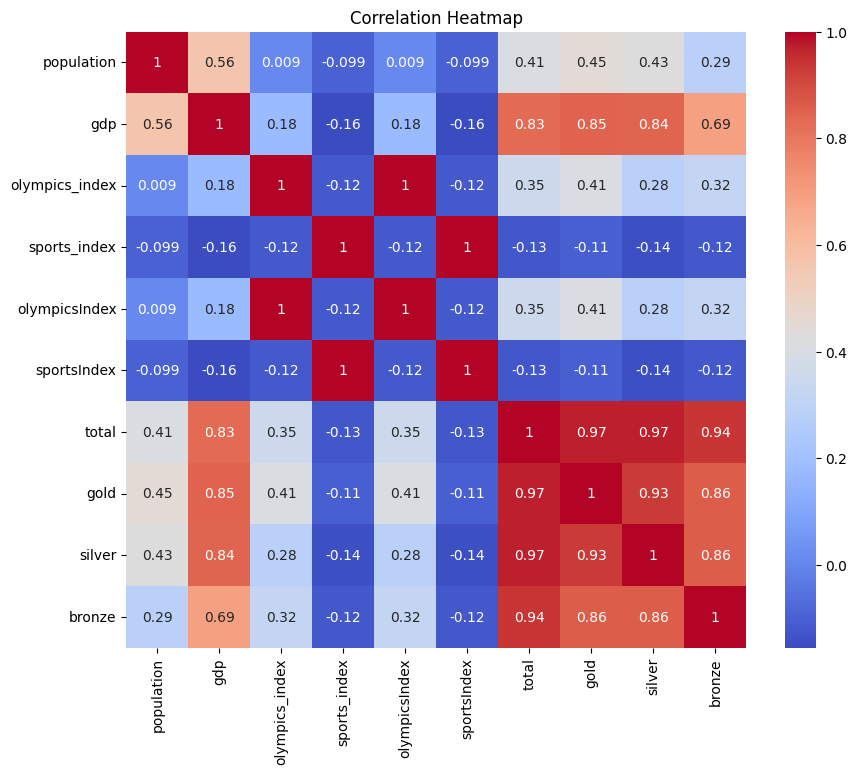

In [21]:
# 9. Correlation matrix
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2.2 EDA: Univariate Analysis

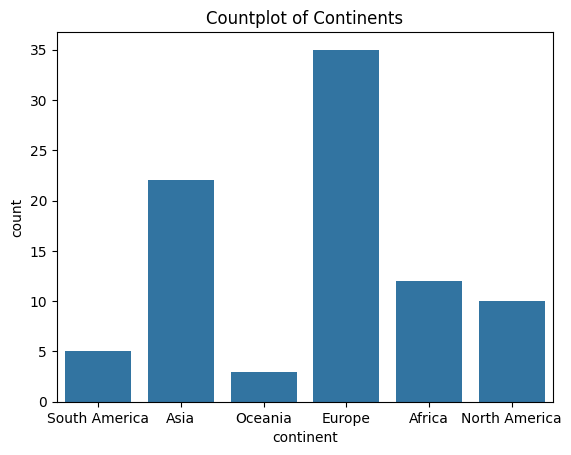

In [22]:
# Countplot for a categorical variable (continent)
sns.countplot(x='continent', data=data)
plt.title('Countplot of Continents')
plt.show()


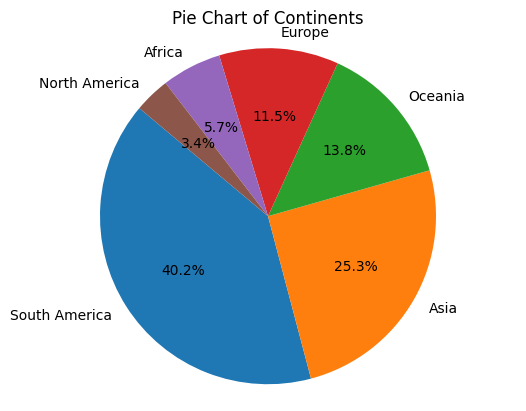

In [23]:
# Pie chart for total medals distribution
labels = data['continent'].unique()
sizes = data['continent'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Continents')
plt.axis('equal')
plt.show()

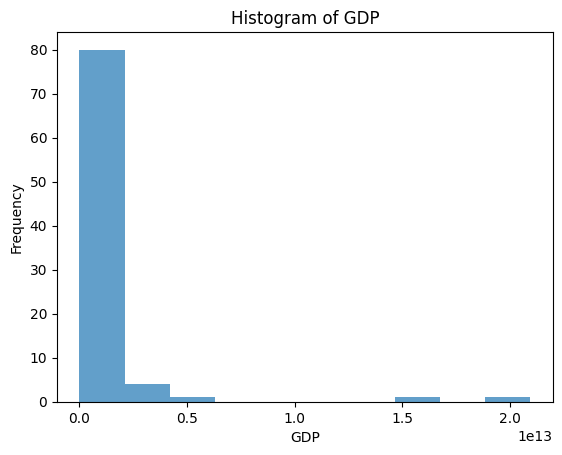

In [24]:
# Histogram for GDP
plt.hist(data['gdp'], bins=10, alpha=0.7)
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

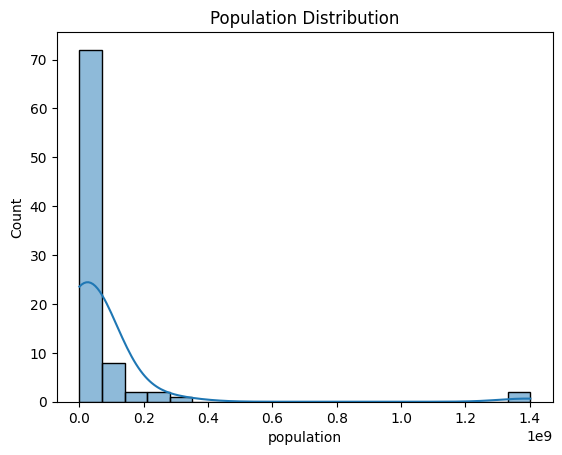

In [25]:
# Distplot for population
sns.histplot(data['population'], kde=True, bins=20)
plt.title('Population Distribution')
plt.show()


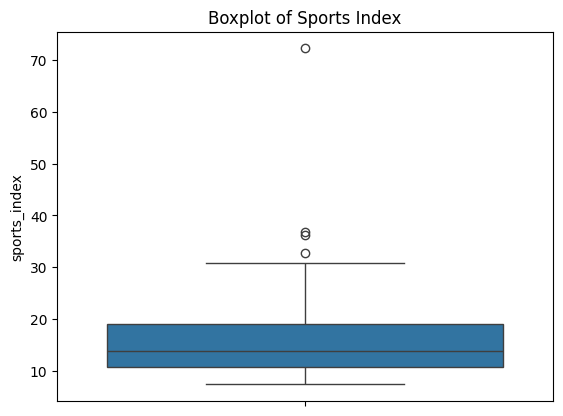

In [26]:
# Boxplot for sports index
sns.boxplot(y='sports_index', data=data)
plt.title('Boxplot of Sports Index')
plt.show()

In [27]:
# Summary statistics for specific features
print("GDP Statistics:")
print("Min:", data['gdp'].min())
print("Max:", data['gdp'].max())
print("Mean:", data['gdp'].mean())
print("Standard Deviation:", data['gdp'].std())
print("Variance:", data['gdp'].var())

GDP Statistics:
Min: 1089203704
Max: 20936600000000
Mean: 920740804234.184
Standard Deviation: 2786623155872.111
Variance: 7.765268612842643e+24


In [28]:
# Skewness of numerical columns
print("Skewness of Numerical Features:")
print(data[['gdp', 'population', 'sports_index']].skew())

Skewness of Numerical Features:
gdp             5.901011
population      5.761969
sports_index    3.173088
dtype: float64


## 2.3 EDA: Multivariate Analysis

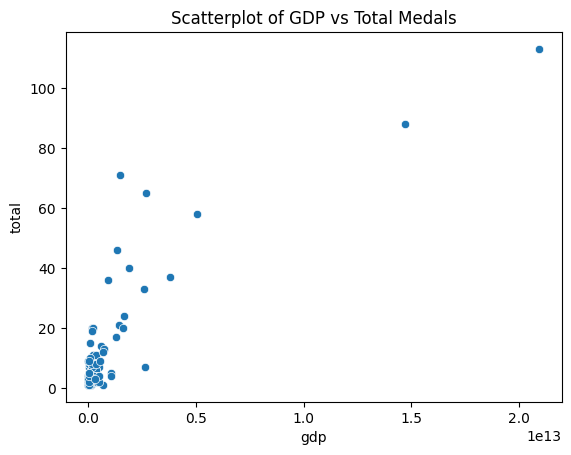

In [29]:
# Scatterplot for GDP vs. Total Medals
sns.scatterplot(x='gdp', y='total', data=data)
plt.title('Scatterplot of GDP vs Total Medals')
plt.show()

<ipython-input-30-49069b5224a7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='continent', y='total', data=data, ci=None)


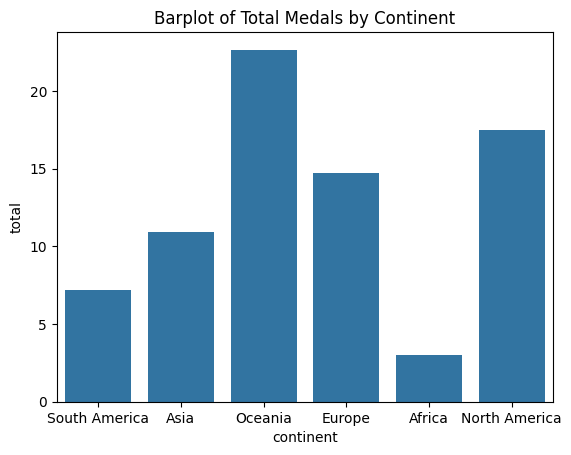

In [30]:
# Barplot for medals by continent
sns.barplot(x='continent', y='total', data=data, ci=None)
plt.title('Barplot of Total Medals by Continent')
plt.show()

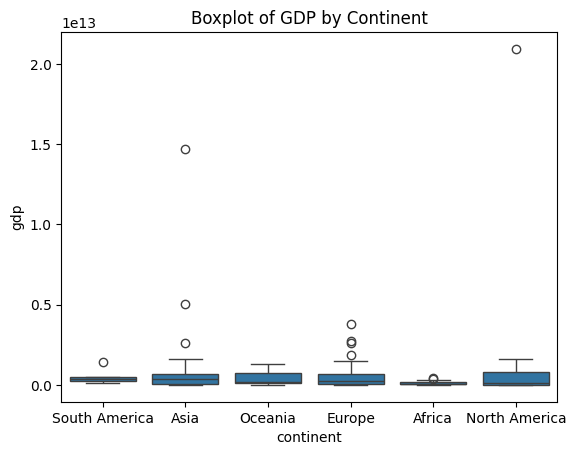

In [31]:
# Boxplot for GDP by continent
sns.boxplot(x='continent', y='gdp', data=data)
plt.title('Boxplot of GDP by Continent')
plt.show()

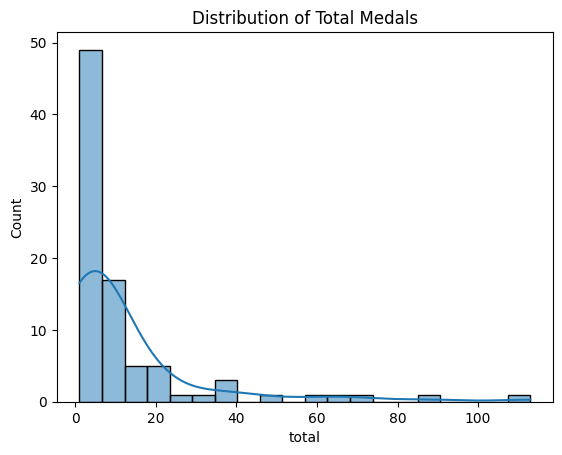

In [32]:
# Distplot for Total Medals
sns.histplot(data['total'], kde=True, bins=20)
plt.title('Distribution of Total Medals')
plt.show()

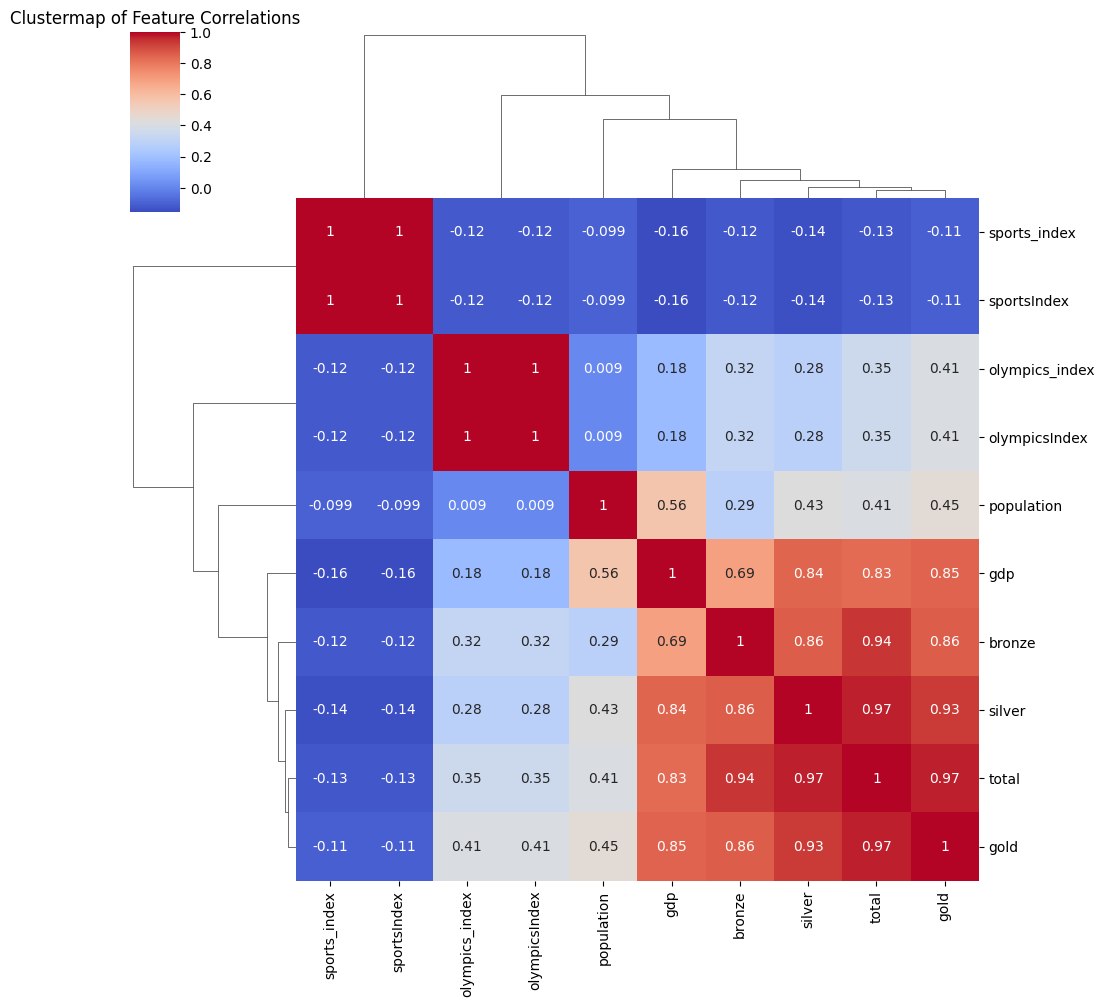

In [34]:
# Clustermap of correlations
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.clustermap(numerical_data.corr(), cmap='coolwarm', annot=True)
plt.title('Clustermap of Feature Correlations')
plt.show()

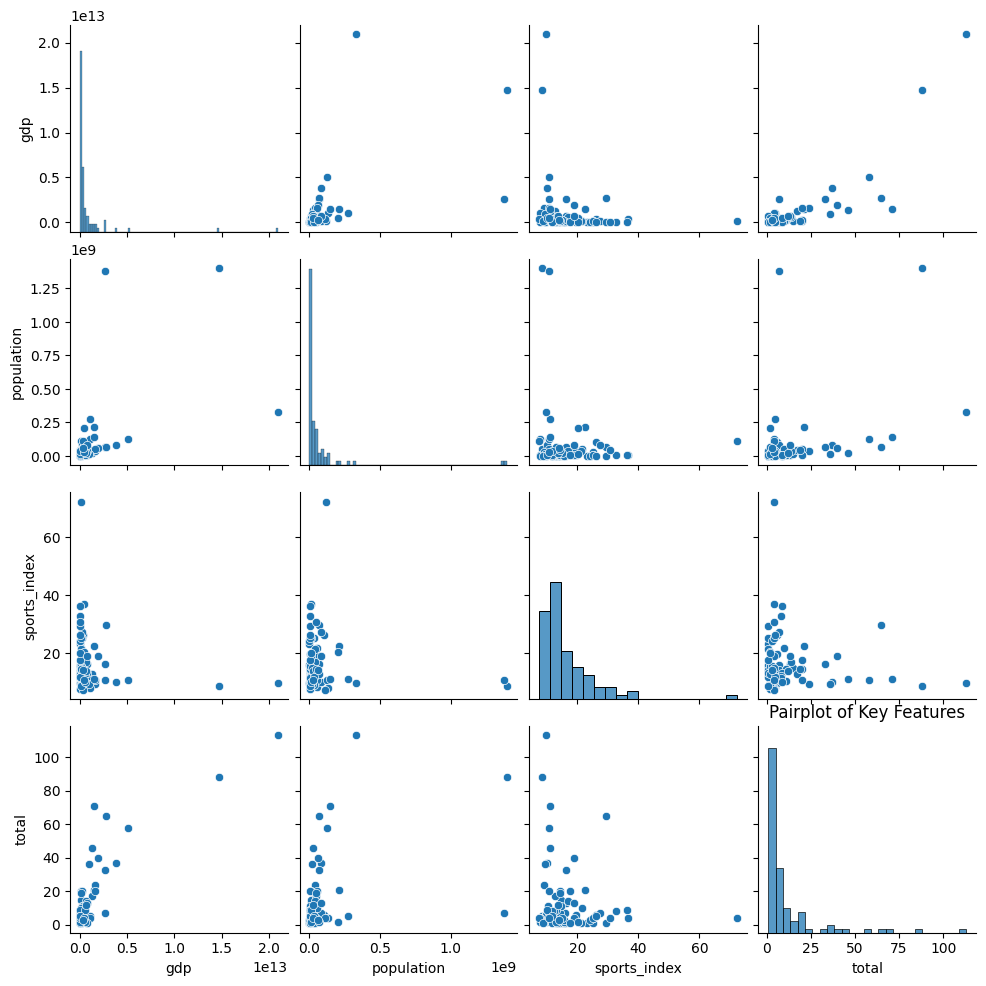

In [35]:
# Pairplot for key numerical features
sns.pairplot(data[['gdp', 'population', 'sports_index', 'total']])
plt.title('Pairplot of Key Features')
plt.show()

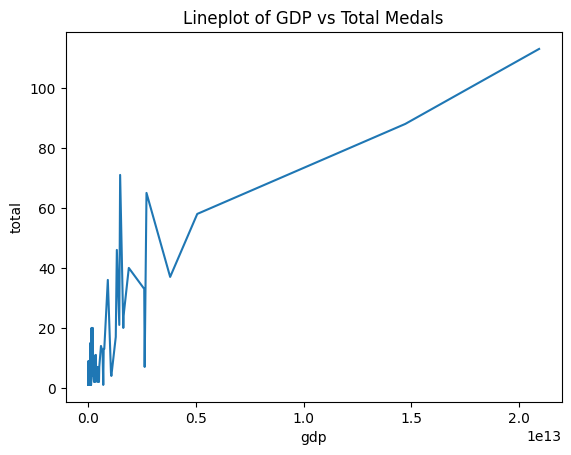

In [36]:
# Lineplot for GDP and Total Medals
sns.lineplot(x='gdp', y='total', data=data)
plt.title('Lineplot of GDP vs Total Medals')
plt.show()


# Feature Engineering
1. Feature Transformation
	* Missing Value imputation
	* Handling categorical Features
	* Outlier detection
	* Feature scaling
2. Feature Construction
3. Feature Selection
Feature Extraction

In [ ]:
# Missing Value Imputation
# Impute missing values with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
data[['gdp', 'population', 'sports_index']] = imputer.fit_transform(data[['gdp', 'population', 'sports_index']])

In [ ]:
# Handling Categorical Features
# Convert categorical features (if any) to numerical using one-hot encoding (example: 'continent')
data = pd.get_dummies(data, columns=['continent'], drop_first=True)

In [ ]:
# Outlier Handling
# Replace outliers using the IQR method with median values
for column in ['gdp', 'population', 'sports_index']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, data[column].median(), data[column])
    data[column] = np.where(data[column] > upper_bound, data[column].median(), data[column])

In [ ]:
#Feature Scaling
scaler = StandardScaler()
data[['gdp', 'population', 'sports_index']] = scaler.fit_transform(data[['gdp', 'population', 'sports_index']])

In [ ]:
#alternative to the above scaling
# Normalize numerical features (GDP and population)
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['gdp', 'population']] = scaler.fit_transform(data[['gdp', 'population']])
'''

In [ ]:
# Feature Engineering
# Feature Construction: Interaction between GDP and Population
data['gdp_population_interaction'] = data['gdp'] * data['population']

In [ ]:
# Advanced Feature Selection
# Use SelectKBest to select top 3 features based on ANOVA F-statistics
X = data[['gdp', 'population', 'sports_index', 'gdp_population_interaction']]
y = data['total']
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:
# Replace X with PCA-transformed features if desired
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#EDA after data preprocessing and feature engineering

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot
plt.scatter(data['gdp'], data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

# Train-Test Split

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Machine Learning

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [ ]:
# Evaluate Models
results = {
    'Linear Regression': evaluate_model(y_test, y_pred_lr),
    'Decision Tree': evaluate_model(y_test, y_pred_dt),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
}

results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R2']).T
print(results_df)

#Deep Learning

In [ ]:
# Build Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
y_pred_nn = model.predict(X_test)

In [ ]:
# Add Neural Network to Results
nn_results = evaluate_model(y_test, y_pred_nn.flatten())
results_df.loc['Neural Network'] = nn_results
print(results_df)

In [ ]:
# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Neural Network Training History')
plt.show()


In [ ]:

# Normalize numerical features (GDP and population)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['gdp', 'population']] = scaler.fit_transform(data[['gdp', 'population']])

# Feature Engineering
data['gdp_population_interaction'] = data['gdp'] * data['population']

# Split dataset into features and target
target = 'total'
X = data[['gdp', 'population', 'sports_index', 'gdp_population_interaction']]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot
plt.scatter(data['gdp'], data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

## Machine Learning Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluate Models
results = {
    'Linear Regression': evaluate_model(y_test, y_pred_lr),
    'Decision Tree': evaluate_model(y_test, y_pred_dt),
    'Random Forest': evaluate_model(y_test, y_pred_rf),
}

results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R2']).T
print(results_df)

## Deep Learning Model

# Build Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
y_pred_nn = model.predict(X_test)

# Add Neural Network to Results
nn_results = evaluate_model(y_test, y_pred_nn.flatten())
results_df.loc['Neural Network'] = nn_results
print(results_df)

# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Neural Network Training History')
plt.show()
